<a href="https://colab.research.google.com/github/IrynaBarnych/AI18/blob/hw/AI_18_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оберіть одне завдання на вибір

# Завдання 1

За допомогою сегментації зображень замінітть фон для зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

на фон з https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* отримайте маску для зображення людей, де `True` - піксель класу людини, `False` - піксель іншого класу
* зробіть зображення лісу такого ж розміру як і зображення людей
* застосуйте маску щоб змінити значення пікселів зображення лісу на пікселі зображення людей
* Якщо результат поганий можете спробувати використати маску для класу `__background`

In [ ]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision import transforms
import matplotlib.pyplot as plt

# Завантажуємо зображення
img_h = read_image("/content/humans.jpg")

# Змінюємо розмір
img_h = transforms.Resize((540, 960))(img_h)

# Завантажуємо натреновану модель
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Завантажуємо препроцесор для моделі(без зміни розмірів)
preprocess = weights.transforms(resize_size=None)

# Обробляєио забраження та змінюємо розмірність до [1, 3, width, height]
batch = preprocess(img_h)
batch = batch.unsqueeze(0)

# Робимо прогноз
with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

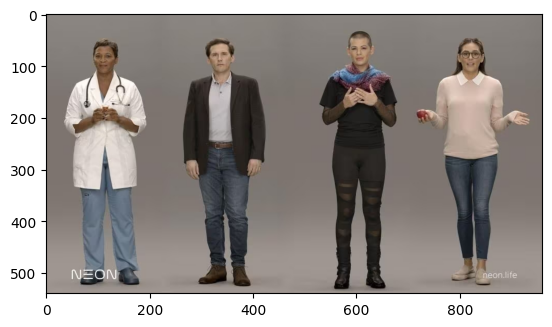

In [ ]:
import matplotlib.pyplot as plt

# Візуалізація
plt.imshow(img_h.permute(1, 2, 0))

In [ ]:
# Завантажуємо зображення
img_f = read_image("/content/forest.jpg")

# Змінюємо розмір
img_f = transforms.Resize((540, 960))(img_f)

# Завантажуємо натреновану модель
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Завантажуємо препроцесор для моделі(без зміни розмірів)
preprocess = weights.transforms(resize_size=None)

# Обробляєио забраження та змінюємо розмірність до [1, 3, width, height]
batch = preprocess(img_f)
batch = batch.unsqueeze(0)

# Робимо прогноз
with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

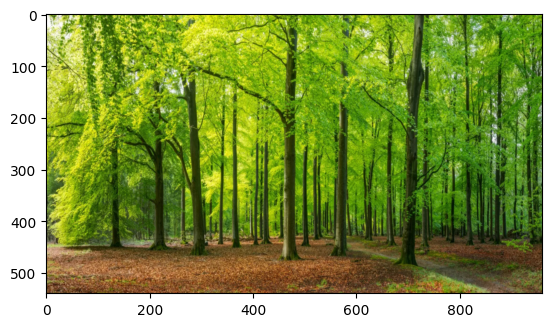

In [ ]:
import matplotlib.pyplot as plt

# Візуалізація
plt.imshow(img_f.permute(1, 2, 0))

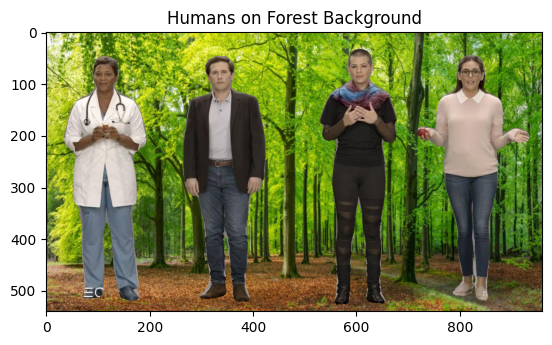

In [ ]:
# Обробка зображення людей та отримання маски людей
batch = preprocess(img_h.unsqueeze(0))
with torch.no_grad():
    prediction = model(batch)["out"]
masks = prediction.argmax(dim=1)
human_mask = masks[0]

# Вибір пікселів фону на зображенні лісу
background_mask = human_mask == 0

# Застосування маски до зображення лісу
masked_forest = img_f.clone()
for i in range(3):  # Перебираємо канали RGB
    masked_forest[i][~background_mask] = img_h[i][~background_mask]  # Замінюємо пікселі фону лісу на пікселі людей

# Візуалізація результату
plt.imshow(masked_forest.permute(1, 2, 0))
plt.title('Humans on Forest Background')
plt.show()

# Завдання 2

Проведіть детекцію об'єктів для відео

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

Підберіть параметри для якісного виявлення машин та знаків
Код для перетворення набору зображень у відео є нижче

[документація](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/250) /video.mp4: 640x384 1 car, 195.0ms
video 1/1 (frame 2/250) /video.mp4: 640x384 1 car, 149.3ms
video 1/1 (frame 3/250) /video.mp4: 640x384 1 car, 143.0ms
video 1/1 (frame 4/250) /video.mp4: 640x384 1 car, 146.0ms
video 1/1 (frame 5/250) /video.mp4: 640x384 1 car, 142.1ms
video 1/1 (frame 6/250) /video.mp4: 640x384 1 car, 149.3ms
video 1/1 (frame 7/250) /video.mp4: 640x384 1 car, 160.1ms
video 1/1 (frame 8/250) /video.mp4: 640x384

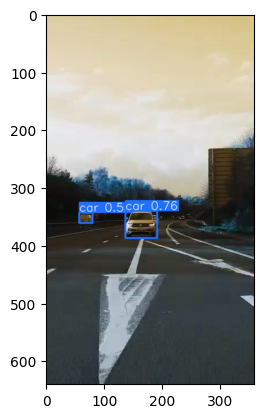

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

!pip install -q ultralytics

from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model.predict(source='/video.mp4',
                        conf=0.5,
                        iou=0.4)

result = results[0]


img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for result in results:
    frames.append([plt.imshow(result.plot())])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('output.mp4')
plt.show()

# Завдання 3

Згенеруйте зображення на основі тексту

[документація](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)

In [2]:
pip install diffusers


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

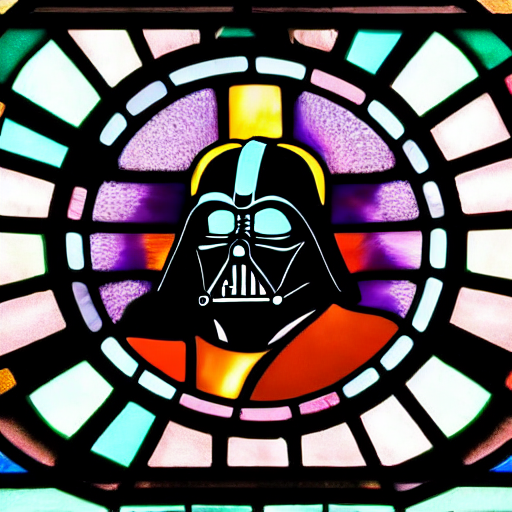

In [3]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float32
).to("cpu")



image = pipeline("stained glass of darth vader, backlight, centered composition, masterpiece, photorealistic, 8k").images[0]
image
